# Data Collection & Exploration



In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip bank.zip


--2023-02-28 15:34:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.64MB/s    in 0.3s    

2023-02-28 15:34:33 (1.64 MB/s) - ‘bank.zip’ saved [579043/579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sn
import pickle

In [3]:
df=pd.read_csv('bank-full.csv',delimiter=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
print('No. of columns: ',df.shape[1])
print('No. of rows: ',df.shape[0])

No. of columns:  17
No. of rows:  45211


In [5]:
print('No.of nulls:',df.isna().sum())


No.of nulls: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Histograms of Variables


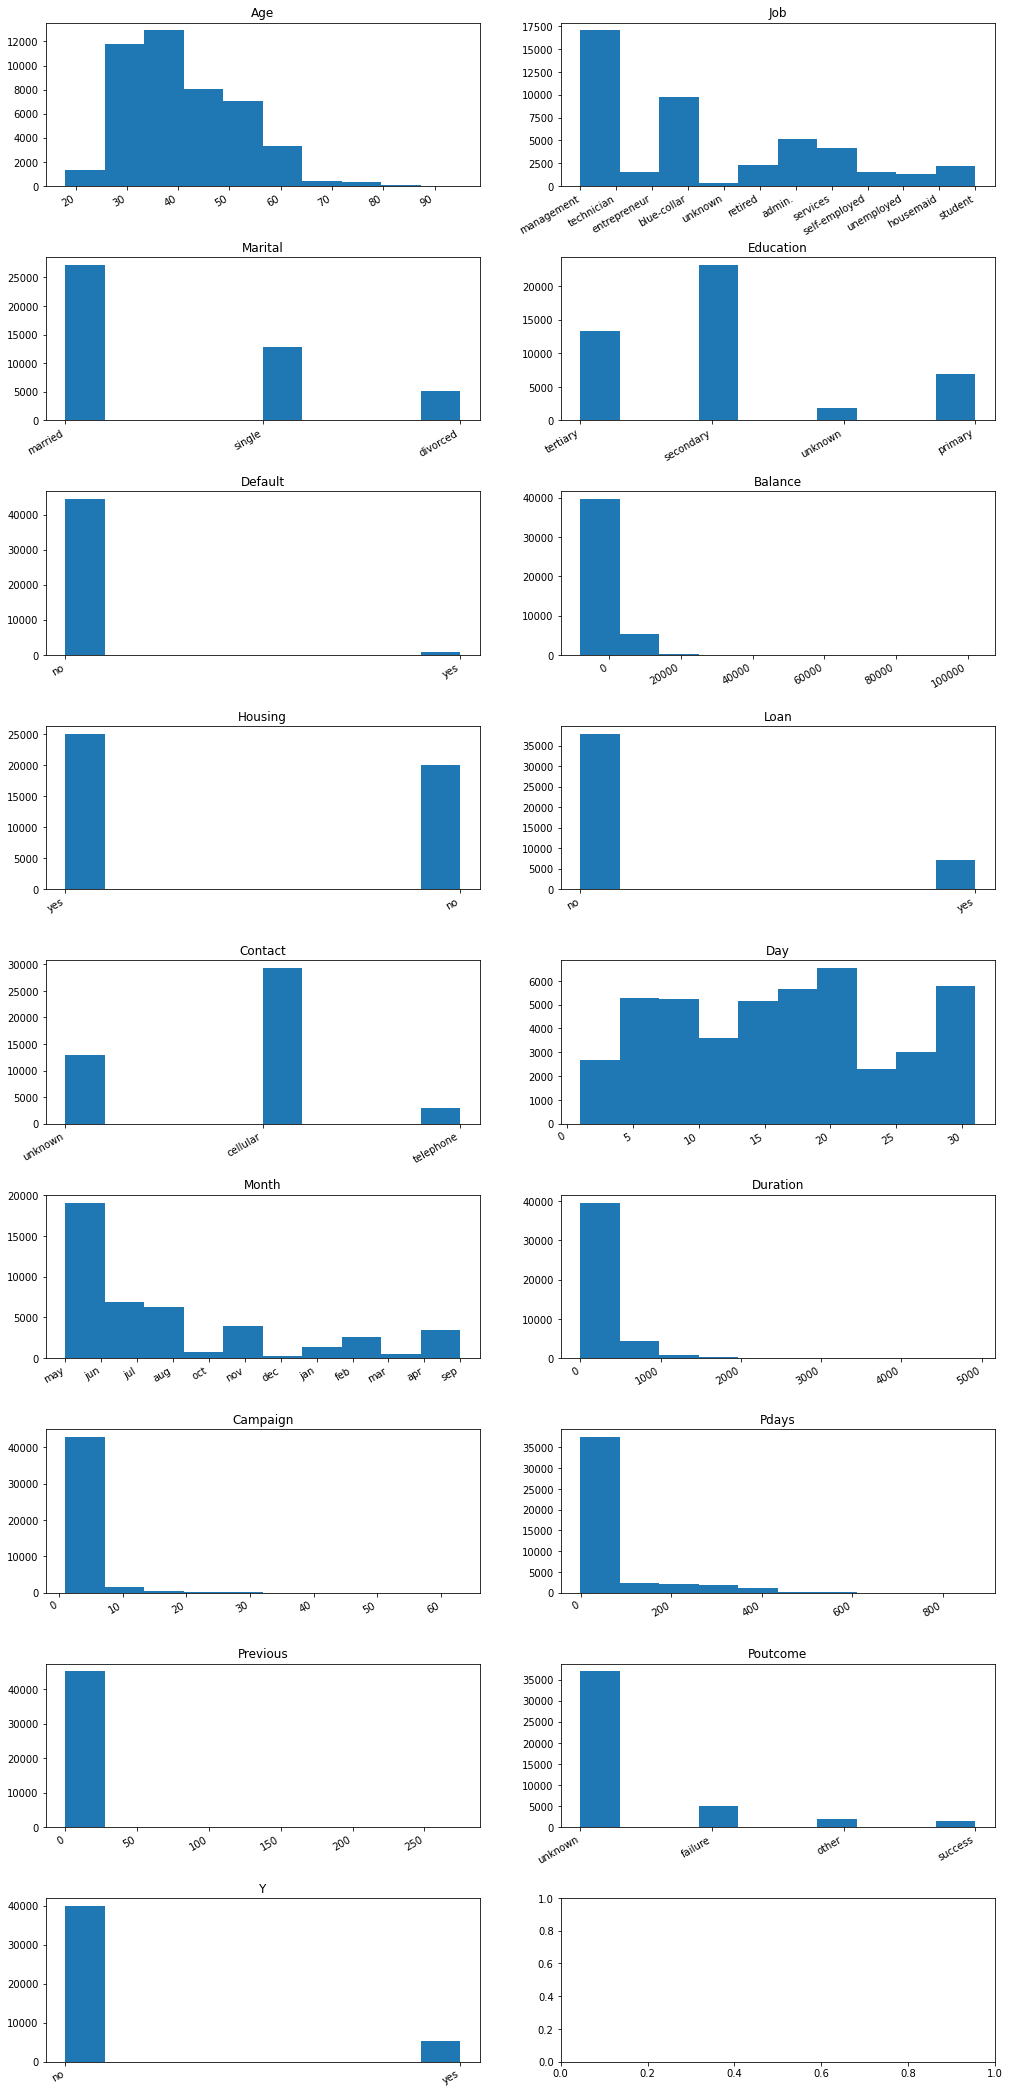

In [7]:
%matplotlib inline
fig, axs = plt.subplots(9,2)
fig.set_size_inches(15,30)
fig.tight_layout(pad=5.0)

c=0
print('Histograms of Variables')
for i in range(9):
  for j in range(2):
    if(c<df.shape[1]):
      axs[i,j].hist(df.iloc[:,c],bins=10)    
      axs[i, j].set_title(str(df.columns.values.tolist()[c]).capitalize())
      #axs[i, j].set_ylim(axs[i, j].get_ylim()[::-1])
      #axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
      plt.setp(axs[i, j].get_xticklabels(), rotation=30, horizontalalignment='right')
    c+=1
plt.show()

**Insights**
1. Most of the customers b/w age 20 and 60.
2. People working in Management field and Entrepreneurs most likly to apply for loan.
3. Unbalanced Dataset. 



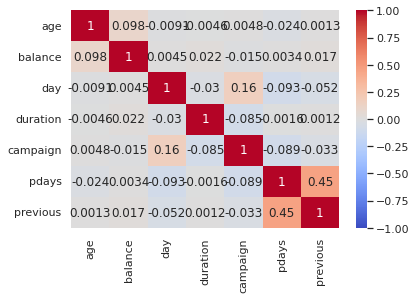

In [8]:
sn.set_theme('notebook')
sn.color_palette("Spectral", as_cmap=True)
sn.heatmap(df.corr(),vmin=-1,vmax=1,cmap='coolwarm', annot=True)
plt.show()

**Note:**
* pdays positively correlated with target var.




## Normalizing and balancing dataset



In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn import preprocessing


<AxesSubplot:xlabel='y', ylabel='count'>

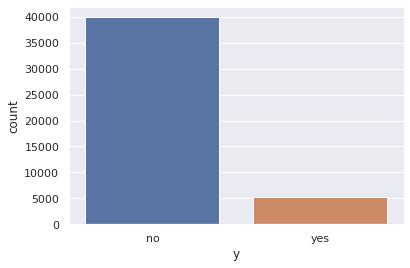

In [10]:
sn.countplot(x='y',data=df)

In [11]:
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
df=d1

<AxesSubplot:xlabel='y', ylabel='count'>

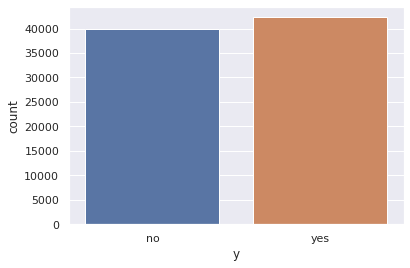

In [12]:
sn.countplot(x='y',data=df)

In [13]:
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
df['pdays2']=df.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
df['pdays']=df.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
df['pdays']=df['pdays'].astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [14]:
id_numeric=[]
id_category=[]
for x in range(0,len(df.dtypes)):
  if(df.dtypes[x]=="int64"):
    id_numeric.append(x)
  elif(df.dtypes[x]=="object"):
    id_category.append(x)
id_numeric
id_category
    



[1, 2, 3, 4, 6, 7, 8, 10, 15, 16]

In [15]:
scaler = MinMaxScaler()
df[df.columns[id_numeric]] = scaler.fit_transform(df[df.columns[id_numeric]])


In [16]:

df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays2
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.0,0.0,0.0,unknown,no,0.0
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.0,0.0,0.0,unknown,no,0.0
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.0,0.0,0.0,unknown,no,0.0
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.0,0.0,0.0,unknown,no,0.0
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.0,0.0,0.0,unknown,no,0.0


In [17]:
enc = OrdinalEncoder()
df[['poutcome','default','housing','loan']] = enc.fit_transform(df[['poutcome','default','housing','loan']])

df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays2
0,0.519481,management,married,tertiary,0.0,0.092259,1.0,0.0,unknown,0.133333,may,0.053070,0.0,0.0,0.0,3.0,no,0.0
1,0.337662,technician,single,secondary,0.0,0.073067,1.0,0.0,unknown,0.133333,may,0.030704,0.0,0.0,0.0,3.0,no,0.0
2,0.194805,entrepreneur,married,secondary,0.0,0.072822,1.0,1.0,unknown,0.133333,may,0.015453,0.0,0.0,0.0,3.0,no,0.0
3,0.376623,blue-collar,married,unknown,0.0,0.086476,1.0,0.0,unknown,0.133333,may,0.018707,0.0,0.0,0.0,3.0,no,0.0
4,0.194805,unknown,single,unknown,0.0,0.072812,0.0,0.0,unknown,0.133333,may,0.040260,0.0,0.0,0.0,3.0,no,0.0


## Encoding the Labels

In [18]:
enc=OneHotEncoder()
nominal = ['job','marital','education','contact','month']
dataProcessed = pd.get_dummies(df,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
dataProcessed.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'pdays2',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [20]:
dataProcessed.shape

(82234, 47)

In [21]:
dataProcessed.to_csv('DataProcessed.csv',index=False)

# Machine Learning Model using Support Vector Machine


In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sn
from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

seed=np.random.seed(786)

In [23]:
df=pd.read_csv('DataProcessed.csv')
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
X = df.drop('y', axis=1).values
y = df['y'].values

In [25]:
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(X)
print('No. of features before PCA:',X.shape)
print('No. of features after PCA(90% variance):',x_pca.shape)

with open('pca.pkl', 'wb') as pickle_file:
        pickle.dump(pca, pickle_file)

No. of features before PCA: (82234, 46)
No. of features after PCA(90% variance): (82234, 20)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20, random_state=seed)

In [27]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-1], "C": [1]},
    {"kernel": ["linear"], "C": [1]},
]

In [28]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision',n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision', verbose=1)

In [29]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.7633313748964318


In [30]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, clf.predict(X_test)
pre2 = precision_score(y_true, y_pred)
rec2 = recall_score(y_true, y_pred)
acc2 = accuracy_score(y_true, y_pred)
f1_2 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre2)
print('recall on the evaluation set: ', rec2)
print('accuracy on the evaluation set: ', acc2)

precision on the evaluation set:  0.7700865265760197
recall on the evaluation set:  0.6615929203539823
accuracy on the evaluation set:  0.723840214020794


In [31]:
import joblib

#save your model or results
joblib.dump(clf, 'svm_model.pkl')



['svm_model.pkl']

# Deep Learning Model using Artificial Neural Network

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sn
from sklearn.decomposition import PCA

In [33]:
df=pd.read_csv('DataProcessed.csv')
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
X = df.drop('y', axis=1).values
y = df['y'].values

In [35]:
seed=np.random.seed(786)

**Splitting into Train,Val,Test sets**

In [36]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio,random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_ratio/(test_ratio + validation_ratio),random_state=seed)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [38]:
## Model Layers
n_inputs=X.shape[1]
model=Sequential()
model.add(Dense(32,input_dim=n_inputs,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [40]:
history=model.fit(X, y, epochs=100, batch_size=1024,verbose=1,validation_data=(X_val, y_val))

Epoch 1/100
81/81 [==============================] - 1s 5ms/step - loss: 0.6471 - accuracy: 0.6145 - val_loss: 0.5834 - val_accuracy: 0.7023
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7393 - val_loss: 0.5127 - val_accuracy: 0.7719
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8058 - val_loss: 0.4246 - val_accuracy: 0.8291
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8401 - val_loss: 0.3823 - val_accuracy: 0.8475
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8503 - val_loss: 0.3739 - val_accuracy: 0.8527
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8537 - val_loss: 0.3614 - val_accuracy: 0.8551
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8570 - val_loss: 0.3620 - val_accuracy: 0.8489
Epoch 8/100
8

In [41]:
from matplotlib import pyplot
def plot_history(history):
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.show()
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

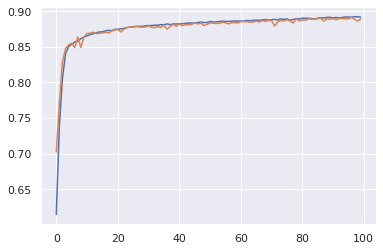

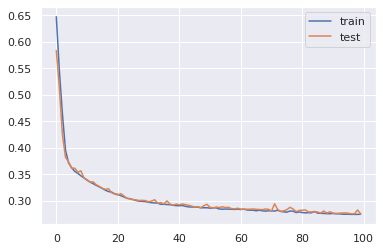

In [42]:
plot_history(history)

In [43]:
model.evaluate(X_test,y_test)

1028/1028 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.8955


[0.26838406920433044, 0.895452082157135]

In [44]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
